In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h1> Loading Dataset </h1>

In [2]:
df=pd.read_csv(r"D:\DataSets/purchasing.csv",encoding="latin")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


<h1>Data Cleaning & Transformation</h1>

In [4]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [7]:
df.duplicated().sum()

5225

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


In [11]:
# Filter out the rows with InvoiceNo starting with "C" and create a new column indicating the transaction status

df["transaction_status"]=np.where(df["InvoiceNo"].str.startswith("C"),"Cancelled","Completed")
cancelled_trans= df[df["transaction_status"]=="Cancelled"]
cancelled_trans.describe()

,Quantity,UnitPrice,CustomerID
count,8872.000000,8872.000000,8872.000000
mean,-30.774910,18.899512,14990.152953
std,1172.249902,445.190864,1708.230387
min,-80995.000000,0.010000,12346.000000
25%,-6.000000,1.450000,13505.000000
50%,-2.000000,2.950000,14868.000000
75%,-1.000000,4.950000,16393.000000
max,-1.000000,38970.000000,18282.000000


<h4>There are 8872 Failed or Cancelled transactions. All quantities in the cancelled transactions are negative, indicating that these are indeed orders that were cancelled. 

The UnitPrice column has a considerable spread, showing that a variety of products, from low to high value, were part of the cancelled transactions.</h4>

In [12]:
#Percentage of Cancelled Transaction

cancelled_percentage = (cancelled_trans.shape[0]/ df.shape[0]) * 100
print(f"The percentage of cancelled transactions is : {cancelled_percentage:.2f}%") #.2f ensures maximum 2 decimal point

The percentage of cancelled transactions is : 2.21%


In [13]:
# Finding the number of unique stock codes
unique_stock_codes=df["StockCode"].nunique()
print(f"Total number of unique stock_codes are : {unique_stock_codes} ")

Total number of unique stock_codes are : 3684 


In [14]:
df["StockCode"].value_counts(normalize=True).head(10)*100

StockCode
85123A    0.514188
22423     0.471609
85099B    0.413093
47566     0.350843
84879     0.349847
20725     0.335156
22720     0.304778
POST      0.297806
22197     0.276392
23203     0.275894
Name: proportion, dtype: float64

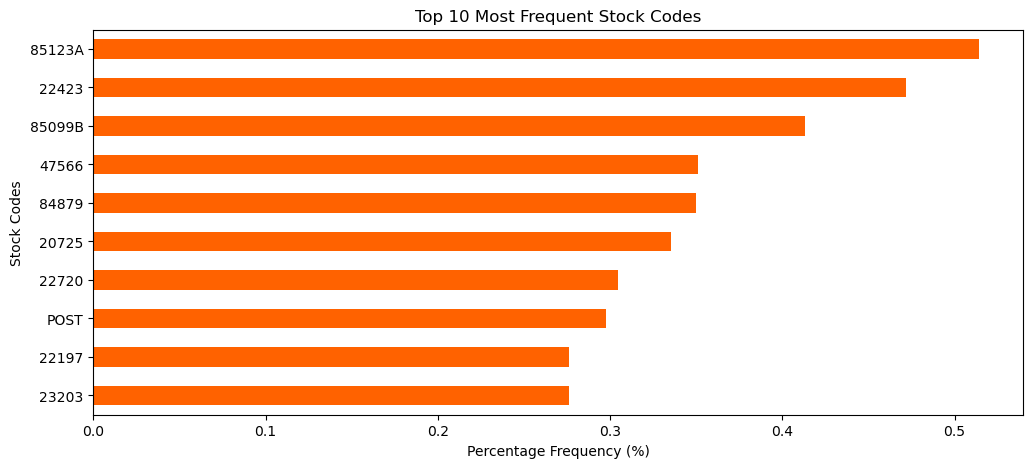

In [15]:
top_10_stock_codes=df["StockCode"].value_counts(normalize=True).head(10)*100
plt.figure(figsize=(12, 5))
top_10_stock_codes.plot(kind='barh', color='#ff6200')
plt.title('Top 10 Most Frequent Stock Codes')
plt.xlabel('Percentage Frequency (%)')
plt.ylabel('Stock Codes')
plt.gca().invert_yaxis()
plt.show()

In [16]:
unique_stock_code=df["StockCode"].unique()
numeric_count= pd.Series(unique_stock_code).apply(lambda x : sum(n.isdigit() for n in str(x))).value_counts()
# Printing the value counts for unique stock codes
print("Value counts of numeric character frequencies in unique stock codes:")
print("-"*70)
print(numeric_count)

Value counts of numeric character frequencies in unique stock codes:
----------------------------------------------------------------------
5    3676
0       7
1       1
Name: count, dtype: int64


<h5>A majority of the unique stock codes (3676 out of 3684) contain exactly 5 numeric characters, which seems to be the standard format for representing product codes in this dataset.
There are a few anomalies: 7 stock codes contain no numeric characters and 1 stock code contains only 1 numeric character..</h5>

In [17]:
anamolous_stock_code = [char for char in unique_stock_code if sum(n.isdigit() for n in str(char)) in (0,1)]
for char in anamolous_stock_code:
    print(char)

POST
D
C2
M
BANK CHARGES
PADS
DOT
CRUK


In [18]:
#droping anamolous stock codes 
df=df[~df["StockCode"].isin(anamolous_stock_code)]
df.shape

(399689, 9)

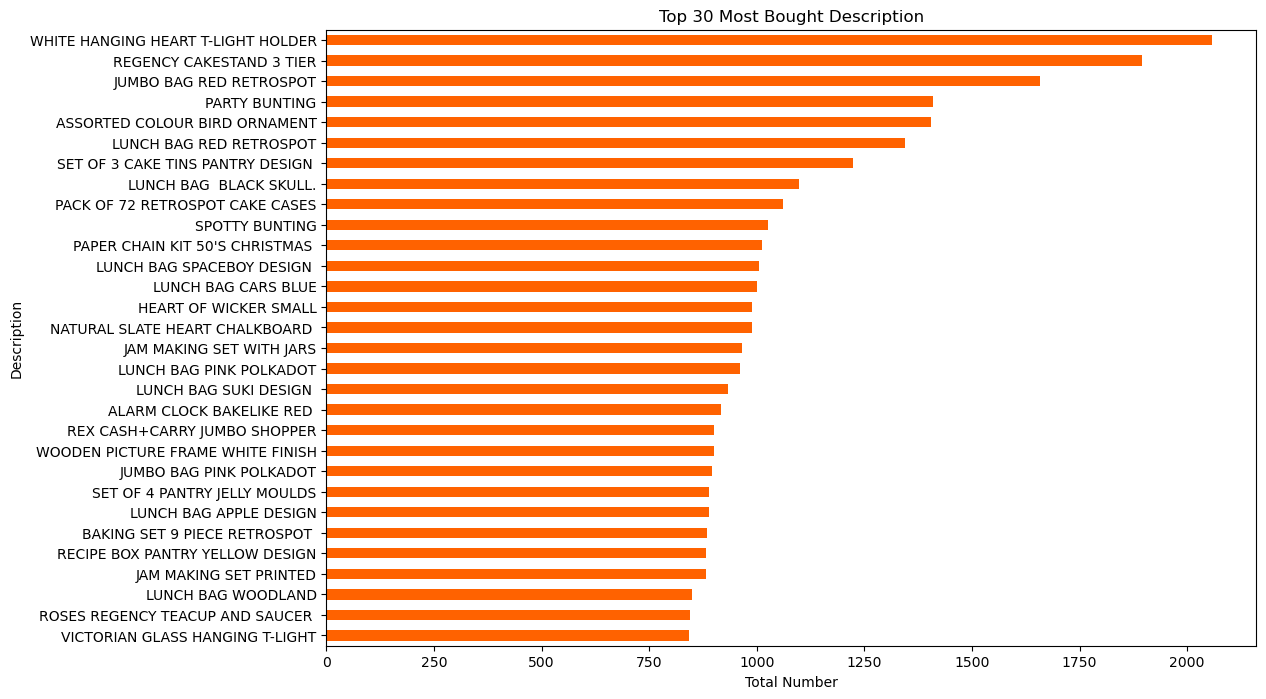

In [19]:
top_30_description_counts = df["Description"].value_counts().head(30)
plt.figure(figsize=(12,8))
top_30_description_counts.plot(kind="barh",color="#ff6200")
plt.title("Top 30 Most Bought Description")
plt.xlabel("Total Number")
plt.ylabel("Description")
plt.gca().invert_yaxis()
plt.show()

<h5>The most frequent descriptions are generally household items, particularly those associated with kitchenware, lunch bags, and decorative items.
</h5><h5>
    
Interestingly, all the descriptions are in uppercase, which might be a standardized format for entering product descriptions in the database. However, considering the inconsistencies and anomalies encountered in the dataset so far, it would bebettert to check if there are descriptions entered in lowercase or a mix of case styles</h5>

In [20]:
unique_description = df["Description"].unique()
lowercase_description = [low for low in unique_description if any(char.islower() for char in low)]

print("The unique descriptions containing lowercase characters are:")
print("-"*100)
for low in lowercase_description:
    print(low)

The unique descriptions containing lowercase characters are:
----------------------------------------------------------------------------------------------------
BAG 500g SWIRLY MARBLES
POLYESTER FILLER PAD 45x45cm
POLYESTER FILLER PAD 45x30cm
POLYESTER FILLER PAD 40x40cm
FRENCH BLUE METAL DOOR SIGN No
BAG 250g SWIRLY MARBLES
BAG 125g SWIRLY MARBLES
3 TRADITIONAl BISCUIT CUTTERS  SET
NUMBER TILE COTTAGE GARDEN No
FOLK ART GREETING CARD,pack/12
ESSENTIAL BALM 3.5g TIN IN ENVELOPE
POLYESTER FILLER PAD 65CMx65CM
NUMBER TILE VINTAGE FONT No 
POLYESTER FILLER PAD 30CMx30CM
POLYESTER FILLER PAD 60x40cm
FLOWERS HANDBAG blue and orange
Next Day Carriage
THE KING GIFT BAG 25x24x12cm
High Resolution Image


In [21]:
service_related_description = ["Next Day Carriage","High Resolution Image"]
service_related_perc = df[df["Description"].isin(service_related_description)].shape[0]/df.shape[0]*100
print(f"The percentage of records with service-related descriptions in the dataset is: {service_related_perc:.2f}%")

The percentage of records with service-related descriptions in the dataset is: 0.02%


In [22]:
# Remove rows with service-related information in the description
df=df[~df["Description"].isin(service_related_description)]

# Standardize the text to uppercase to maintain uniformity across the dataset
df["Description"]=df["Description"].str.upper()

df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,transaction_status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,Completed
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,Completed
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,Completed
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,Completed
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,Completed
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,Completed


In [23]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,399606.000000,399606.000000,399606.000000
mean,12.231718,2.904957,15288.664139
std,250.862855,4.448796,1710.816669
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13959.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,649.500000,18287.000000


<h5>Here in Unit price there are values with entries 0 indicating price of product to be 0</h5>

In [24]:
df[df["UnitPrice"]==0].describe()

,Quantity,UnitPrice,CustomerID
count,33.000000,33.0,33.000000
mean,420.515152,0.0,14252.575758
std,2176.713608,0.0,1659.811925
min,1.000000,0.0,12415.000000
25%,2.000000,0.0,13081.000000
50%,11.000000,0.0,13985.000000
75%,36.000000,0.0,14911.000000
max,12540.000000,0.0,18059.000000


<h5>The transactions with a unit price of zero are relatively few in number (33 transactions).</h5>


In [25]:
# Removing records with a unit price of zero to avoid potential data entry errors
df=df[df["UnitPrice"]>0]
df.shape

(399573, 9)

In [26]:
# Resetting the index of the cleaned dataset
df.reset_index(inplace=True,drop=True)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,transaction_status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,Completed
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,Completed
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
...,...,...,...,...,...,...,...,...,...
399568,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,Completed
399569,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,Completed
399570,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,Completed
399571,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,Completed


<h1>Recency(R)</h1>

In [27]:
# Convert InvoiceDate to datetime type
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Convert InvoiceDate to datetime and extract only the date
df['InvoiceDay'] = df['InvoiceDate'].dt.date

# Find the most recent purchase date for each customer
customer_data = df.groupby('CustomerID')['InvoiceDay'].max().reset_index()

# Find the most recent date in the entire dataset
most_recent_date = df['InvoiceDay'].max()

# Convert InvoiceDay to datetime type before subtraction
customer_data['InvoiceDay'] = pd.to_datetime(customer_data['InvoiceDay'])
most_recent_date = pd.to_datetime(most_recent_date)

# Calculate the number of days since the last purchase for each customer
customer_data['Days_Since_Last_Purchase'] = (most_recent_date - customer_data['InvoiceDay']).dt.days


C:\Users\Admin\AppData\Local\Temp\ipykernel_9292\1779694913.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_9292\1779694913.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDay'] = df['InvoiceDate'].dt.date


In [28]:
# Remove the InvoiceDay column
customer_data.drop(columns=['InvoiceDay'], inplace=True)
customer_data

,CustomerID,Days_Since_Last_Purchase
0,12346.0,325
1,12347.0,2
2,12348.0,75
3,12349.0,18
4,12350.0,310
...,...,...
4357,18280.0,277
4358,18281.0,180
4359,18282.0,7
4360,18283.0,3


<h1>Frequency(F)</h1>

In [29]:
# Calculate Total Number of Transactions made by each customer

total_transactions_per_customer = df.groupby("CustomerID")["InvoiceNo"].nunique().reset_index()
total_transactions_per_customer.rename(columns={"InvoiceNo" : "total_transactions"},inplace=True)
total_transactions_per_customer

,CustomerID,total_transactions
0,12346.0,2
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1
...,...,...
4357,18280.0,1
4358,18281.0,1
4359,18282.0,3
4360,18283.0,16


In [30]:
# Calculate the total number of products purchased by each customer

total_products_purchased = df.groupby("CustomerID")["Quantity"].sum().reset_index()
total_products_purchased.rename(columns={"Quantity":"total_products_purchased"},inplace=True)
total_products_purchased

,CustomerID,total_products_purchased
0,12346.0,0
1,12347.0,2458
2,12348.0,2332
3,12349.0,630
4,12350.0,196
...,...,...
4357,18280.0,45
4358,18281.0,54
4359,18282.0,98
4360,18283.0,1355


In [31]:
# Merge the new features into the customer_data dataframe

customer_data = pd.merge(customer_data , total_transactions_per_customer , on = 'CustomerID')
customer_data = pd.merge(customer_data , total_products_purchased , on = "CustomerID" )
customer_data

,CustomerID,Days_Since_Last_Purchase,total_transactions,total_products_purchased
0,12346.0,325,2,0
1,12347.0,2,7,2458
2,12348.0,75,4,2332
3,12349.0,18,1,630
4,12350.0,310,1,196
...,...,...,...,...
4357,18280.0,277,1,45
4358,18281.0,180,1,54
4359,18282.0,7,3,98
4360,18283.0,3,16,1355


<h1>Monetary(M)</h1>

In [32]:
# Calculate the total spend by each customer
df['Total_Spend'] = df['UnitPrice'] * df['Quantity']
total_spend = df.groupby('CustomerID')['Total_Spend'].sum().reset_index()

# Calculate the average transaction value for each customer
average_transaction_value = total_spend.merge(total_transactions_per_customer, on='CustomerID')
average_transaction_value['Average_Transaction_Value'] = average_transaction_value['Total_Spend'] / average_transaction_value['total_transactions']

# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, total_spend, on='CustomerID')
customer_data = pd.merge(customer_data, average_transaction_value[['CustomerID', 'Average_Transaction_Value']], on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_9292\2497467789.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total_Spend'] = df['UnitPrice'] * df['Quantity']


,CustomerID,Days_Since_Last_Purchase,total_transactions,total_products_purchased,Total_Spend,Average_Transaction_Value
0,12346.0,325,2,0,0.00,0.000000
1,12347.0,2,7,2458,4310.00,615.714286
2,12348.0,75,4,2332,1437.24,359.310000
3,12349.0,18,1,630,1457.55,1457.550000
4,12350.0,310,1,196,294.40,294.400000


<h1>Product Diversity</h1>

In [33]:
# Calculate the number of unique products purchased by each customer

unique_prod_purchased= df.groupby("CustomerID")["StockCode"].nunique().reset_index()
unique_prod_purchased.rename(columns={"StockCode":"unique_prod_purchased"},inplace=True)

# Merge the new feature into the customer_data dataframe

customer_data = pd.merge(customer_data,unique_prod_purchased,on="CustomerID")

customer_data.head()

,CustomerID,Days_Since_Last_Purchase,total_transactions,total_products_purchased,Total_Spend,Average_Transaction_Value,unique_prod_purchased
0,12346.0,325,2,0,0.00,0.000000,1
1,12347.0,2,7,2458,4310.00,615.714286,103
2,12348.0,75,4,2332,1437.24,359.310000,21
3,12349.0,18,1,630,1457.55,1457.550000,72
4,12350.0,310,1,196,294.40,294.400000,16


<h1>Behavioural Features</h1>

In [34]:
# Extract day of week and hour from InvoiceDate
df['Day_Of_Week'] = df['InvoiceDate'].dt.dayofweek
df['Hour'] = df['InvoiceDate'].dt.hour

# Calculate the average number of days between consecutive purchases
days_between_purchases = df.groupby('CustomerID')['InvoiceDay'].apply(lambda x: (x.diff().dropna()).apply(lambda y: y.days))
average_days_between_purchases = days_between_purchases.groupby('CustomerID').mean().reset_index()
average_days_between_purchases.rename(columns={'InvoiceDay': 'Average_Days_Between_Purchases'}, inplace=True)

# Find the favorite shopping day of the week
favorite_shopping_day = df.groupby(['CustomerID', 'Day_Of_Week']).size().reset_index(name='Count')
favorite_shopping_day = favorite_shopping_day.loc[favorite_shopping_day.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'Day_Of_Week']]

# Find the favorite shopping hour of the day
favorite_shopping_hour = df.groupby(['CustomerID', 'Hour']).size().reset_index(name='Count')
favorite_shopping_hour = favorite_shopping_hour.loc[favorite_shopping_hour.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'Hour']]

# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, average_days_between_purchases, on='CustomerID')
customer_data = pd.merge(customer_data, favorite_shopping_day, on='CustomerID')
customer_data = pd.merge(customer_data, favorite_shopping_hour, on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_9292\2052236717.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Day_Of_Week'] = df['InvoiceDate'].dt.dayofweek
C:\Users\Admin\AppData\Local\Temp\ipykernel_9292\2052236717.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hour'] = df['InvoiceDate'].dt.hour
C:\Users\Admin\AppData\Local\Temp\ipykernel_9292\2052236717.py:6: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclud

,CustomerID,Days_Since_Last_Purchase,total_transactions,total_products_purchased,Total_Spend,Average_Transaction_Value,unique_prod_purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour
0,12346.0,325,2,0,0.00,0.000000,1,0.000000,1,10
1,12347.0,2,7,2458,4310.00,615.714286,103,2.016575,1,14
2,12348.0,75,4,2332,1437.24,359.310000,21,10.884615,3,19
3,12349.0,18,1,630,1457.55,1457.550000,72,0.000000,0,9
4,12350.0,310,1,196,294.40,294.400000,16,0.000000,2,16


<h1>Geographic Features</h1>

In [35]:
df["Country"].value_counts(normalize=True).head()

Country
United Kingdom    0.890971
Germany           0.022722
France            0.020402
EIRE              0.018440
Spain             0.006162
Name: proportion, dtype: float64

In [36]:
# Group by CustomerID and Country to get the number of transactions per country for each customer
customer_country = df.groupby(['CustomerID', 'Country']).size().reset_index(name='Number_of_Transactions')

# Get the country with the maximum number of transactions for each customer (in case a customer has transactions from multiple countries)
customer_main_country = customer_country.sort_values('Number_of_Transactions', ascending=False).drop_duplicates('CustomerID')

# Create a binary column indicating whether the customer is from the UK or not
customer_main_country['Is_UK'] = customer_main_country['Country'].apply(lambda x: 1 if x == 'United Kingdom' else 0)

# Merge this data with our customer_data dataframe
customer_data = pd.merge(customer_data, customer_main_country[['CustomerID', 'Is_UK']], on='CustomerID', how='left')

# Display the first few rows of the customer_data dataframe
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,total_transactions,total_products_purchased,Total_Spend,Average_Transaction_Value,unique_prod_purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK
0,12346.0,325,2,0,0.00,0.000000,1,0.000000,1,10,1
1,12347.0,2,7,2458,4310.00,615.714286,103,2.016575,1,14,0
2,12348.0,75,4,2332,1437.24,359.310000,21,10.884615,3,19,0
3,12349.0,18,1,630,1457.55,1457.550000,72,0.000000,0,9,0
4,12350.0,310,1,196,294.40,294.400000,16,0.000000,2,16,0


<h1>Cancellation Insights</h1>

In [37]:
# Calculate the total number of transactions made by each customer
total_transactions = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()

# Calculate the number of cancelled transactions for each customer
cancelled_transactions = df[df['transaction_status'] == 'Cancelled']
cancellation_frequency = cancelled_transactions.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
cancellation_frequency.rename(columns={'InvoiceNo': 'Cancellation_Frequency'}, inplace=True)

# Merge the Cancellation Frequency data into the customer_data dataframe
customer_data = pd.merge(customer_data, cancellation_frequency, on='CustomerID', how='left')

# Replace NaN values with 0 (for customers who have not cancelled any transaction)
customer_data['Cancellation_Frequency'].fillna(0, inplace=True)

# Calculate the Cancellation Rate
customer_data['Cancellation_Rate'] = customer_data['Cancellation_Frequency'] / total_transactions['InvoiceNo']

# Display the first few rows of the customer_data dataframe
customer_data.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_9292\2251683134.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customer_data['Cancellation_Frequency'].fillna(0, inplace=True)


,CustomerID,Days_Since_Last_Purchase,total_transactions,total_products_purchased,Total_Spend,Average_Transaction_Value,unique_prod_purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate
0,12346.0,325,2,0,0.00,0.000000,1,0.000000,1,10,1,1.0,0.5
1,12347.0,2,7,2458,4310.00,615.714286,103,2.016575,1,14,0,0.0,0.0
2,12348.0,75,4,2332,1437.24,359.310000,21,10.884615,3,19,0,0.0,0.0
3,12349.0,18,1,630,1457.55,1457.550000,72,0.000000,0,9,0,0.0,0.0
4,12350.0,310,1,196,294.40,294.400000,16,0.000000,2,16,0,0.0,0.0


In [38]:
from scipy.stats import linregress

# Extract month and year from InvoiceDate
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month

# Calculate monthly spending for each customer
monthly_spending = df.groupby(['CustomerID', 'Year', 'Month'])['Total_Spend'].sum().reset_index()

# Calculate Seasonal Buying Patterns: We are using monthly frequency as a proxy for seasonal buying patterns
seasonal_buying_patterns = monthly_spending.groupby('CustomerID')['Total_Spend'].agg(['mean', 'std']).reset_index()
seasonal_buying_patterns.rename(columns={'mean': 'Monthly_Spending_Mean', 'std': 'Monthly_Spending_Std'}, inplace=True)

# Replace NaN values in Monthly_Spending_Std with 0, implying no variability for customers with single transaction month
seasonal_buying_patterns['Monthly_Spending_Std'].fillna(0, inplace=True)

# Calculate Trends in Spending 
# We are using the slope of the linear trend line fitted to the customer's spending over time as an indicator of spending trends
def calculate_trend(spend_data):
    # If there are more than one data points, we calculate the trend using linear regression
    if len(spend_data) > 1:
        x = np.arange(len(spend_data))
        slope, _, _, _, _ = linregress(x, spend_data)
        return slope
    # If there is only one data point, no trend can be calculated, hence we return 0
    else:
        return 0

# Apply the calculate_trend function to find the spending trend for each customer
spending_trends = monthly_spending.groupby('CustomerID')['Total_Spend'].apply(calculate_trend).reset_index()
spending_trends.rename(columns={'Total_Spend': 'Spending_Trend'}, inplace=True)

# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, seasonal_buying_patterns, on='CustomerID')
customer_data = pd.merge(customer_data, spending_trends, on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_9292\4182571491.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['InvoiceDate'].dt.year
C:\Users\Admin\AppData\Local\Temp\ipykernel_9292\4182571491.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['InvoiceDate'].dt.month
C:\Users\Admin\AppData\Local\Temp\ipykernel_9292\4182571491.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavio

,CustomerID,Days_Since_Last_Purchase,total_transactions,total_products_purchased,Total_Spend,Average_Transaction_Value,unique_prod_purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,12346.0,325,2,0,0.00,0.000000,1,0.000000,1,10,1,1.0,0.5,0.000000,0.000000,0.000000
1,12347.0,2,7,2458,4310.00,615.714286,103,2.016575,1,14,0,0.0,0.0,615.714286,341.070789,4.486071
2,12348.0,75,4,2332,1437.24,359.310000,21,10.884615,3,19,0,0.0,0.0,359.310000,203.875689,-100.884000
3,12349.0,18,1,630,1457.55,1457.550000,72,0.000000,0,9,0,0.0,0.0,1457.550000,0.000000,0.000000
4,12350.0,310,1,196,294.40,294.400000,16,0.000000,2,16,0,0.0,0.0,294.400000,0.000000,0.000000


In [39]:
# Changing the data type of 'CustomerID' to string as it is a unique identifier and not used in mathematical operations
customer_data['CustomerID'] = customer_data['CustomerID'].astype(str)
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4282 entries, 0 to 4281
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CustomerID                      4282 non-null   object 
 1   Days_Since_Last_Purchase        4282 non-null   int64  
 2   total_transactions              4282 non-null   int64  
 3   total_products_purchased        4282 non-null   int64  
 4   Total_Spend                     4282 non-null   float64
 5   Average_Transaction_Value       4282 non-null   float64
 6   unique_prod_purchased           4282 non-null   int64  
 7   Average_Days_Between_Purchases  4282 non-null   float64
 8   Day_Of_Week                     4282 non-null   int32  
 9   Hour                            4282 non-null   int32  
 10  Is_UK                           4282 non-null   int64  
 11  Cancellation_Frequency          4282 non-null   float64
 12  Cancellation_Rate               42

<h1>Outlier Detection and Removal</h1>

In [40]:
from sklearn.ensemble import IsolationForest

# Initializing the IsolationForest model with a contamination parameter of 0.05
model = IsolationForest(contamination=0.1, random_state=0)

# Fitting the model on our dataset (converting DataFrame to NumPy to avoid warning as IsolationForest expects numpy array)
customer_data['Outlier_Scores'] = model.fit_predict(customer_data.iloc[:, 1:].to_numpy())

# Creating a new column to identify outliers (1 for inliers and -1 for outliers)
customer_data['Is_Outlier'] = [1 if x == -1 else 0 for x in customer_data['Outlier_Scores']]

# Display the first few rows of the customer_data dataframe
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,total_transactions,total_products_purchased,Total_Spend,Average_Transaction_Value,unique_prod_purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,Outlier_Scores,Is_Outlier
0,12346.0,325,2,0,0.00,0.000000,1,0.000000,1,10,1,1.0,0.5,0.000000,0.000000,0.000000,1,0
1,12347.0,2,7,2458,4310.00,615.714286,103,2.016575,1,14,0,0.0,0.0,615.714286,341.070789,4.486071,1,0
2,12348.0,75,4,2332,1437.24,359.310000,21,10.884615,3,19,0,0.0,0.0,359.310000,203.875689,-100.884000,-1,1
3,12349.0,18,1,630,1457.55,1457.550000,72,0.000000,0,9,0,0.0,0.0,1457.550000,0.000000,0.000000,-1,1
4,12350.0,310,1,196,294.40,294.400000,16,0.000000,2,16,0,0.0,0.0,294.400000,0.000000,0.000000,1,0


In [41]:
# Separate the outliers for analysis
outliers_data = customer_data[customer_data['Is_Outlier'] == 1]

# Remove the outliers from the main dataset
customer_data_cleaned = customer_data[customer_data['Is_Outlier'] == 0]

# Drop the 'Outlier_Scores' and 'Is_Outlier' columns
customer_data_cleaned = customer_data_cleaned.drop(columns=['Outlier_Scores', 'Is_Outlier'])

# Reset the index of the cleaned data
customer_data_cleaned.reset_index(drop=True, inplace=True)

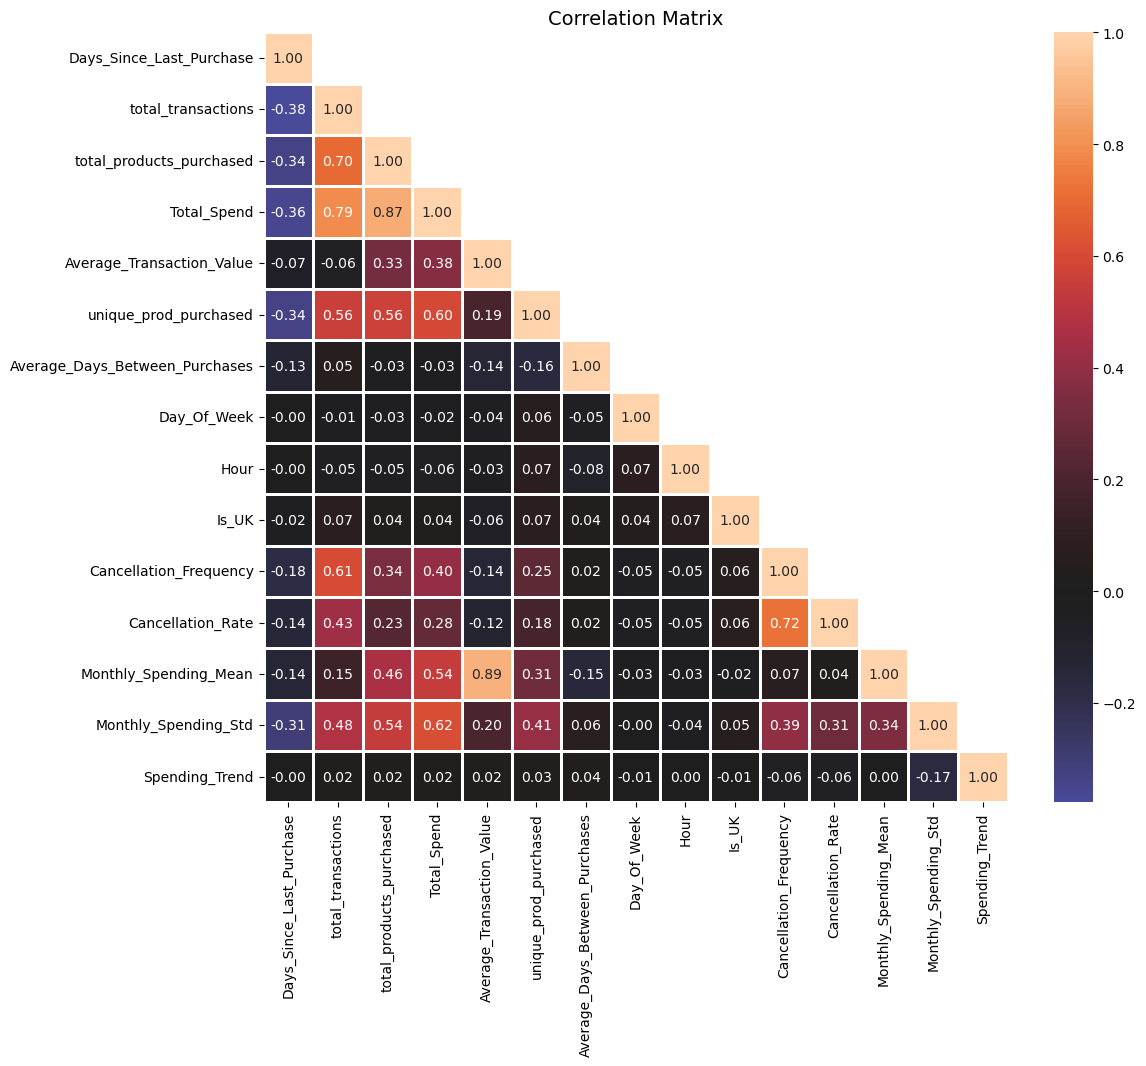

In [42]:
# Plot the heatmap
corr = customer_data_cleaned.drop(columns=['CustomerID']).corr()

# Create a mask to only show the lower triangle of the matrix (since it's mirrored around its 
# top-left to bottom-right diagonal)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, k=1)] = True

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask,annot=True, center=0, fmt='.2f', linewidths=2)
plt.title('Correlation Matrix', fontsize=14)
plt.show()

<h1>Scaling</h1>

In [43]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# List of columns that don't need to be scaled
columns_to_exclude = ['CustomerID', 'Is_UK', 'Day_Of_Week']

# List of columns that need to be scaled
columns_to_scale = customer_data_cleaned.columns.difference(columns_to_exclude)

# Copy the cleaned dataset
customer_data_scaled = customer_data_cleaned.copy()

# Applying the scaler to the necessary columns in the dataset
customer_data_scaled[columns_to_scale] = scaler.fit_transform(customer_data_scaled[columns_to_scale])

# Display the first few rows of the scaled data
customer_data_scaled.head()

,CustomerID,Days_Since_Last_Purchase,total_transactions,total_products_purchased,Total_Spend,Average_Transaction_Value,unique_prod_purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,12346.0,2.312387,-0.472184,-0.825661,-0.892037,-1.386220,-0.948090,-0.434769,1,-1.089046,1,0.574400,0.569906,-1.419698,-0.727797,0.084565
1,12347.0,-0.922245,0.934003,2.633425,3.075540,1.723587,0.986897,-0.149716,1,0.646491,0,-0.541105,-0.438968,1.196508,1.561104,0.114229
2,12350.0,2.162172,-0.753422,-0.549835,-0.621027,0.100715,-0.663533,-0.434769,2,1.514259,0,-0.541105,-0.438968,-0.168775,-0.727797,0.084565
3,12352.0,-0.581757,1.215241,-0.174092,0.272838,-0.587315,0.114256,0.008030,1,0.646491,0,0.574400,-0.186749,-0.075498,0.176169,0.146398
4,12353.0,1.100652,-0.753422,-0.797515,-0.810108,-0.936705,-0.891178,-0.434769,3,1.948143,0,-0.541105,-0.438968,-1.041532,-0.727797,0.084565


<h1>Dimensionallity Reduction</h1>

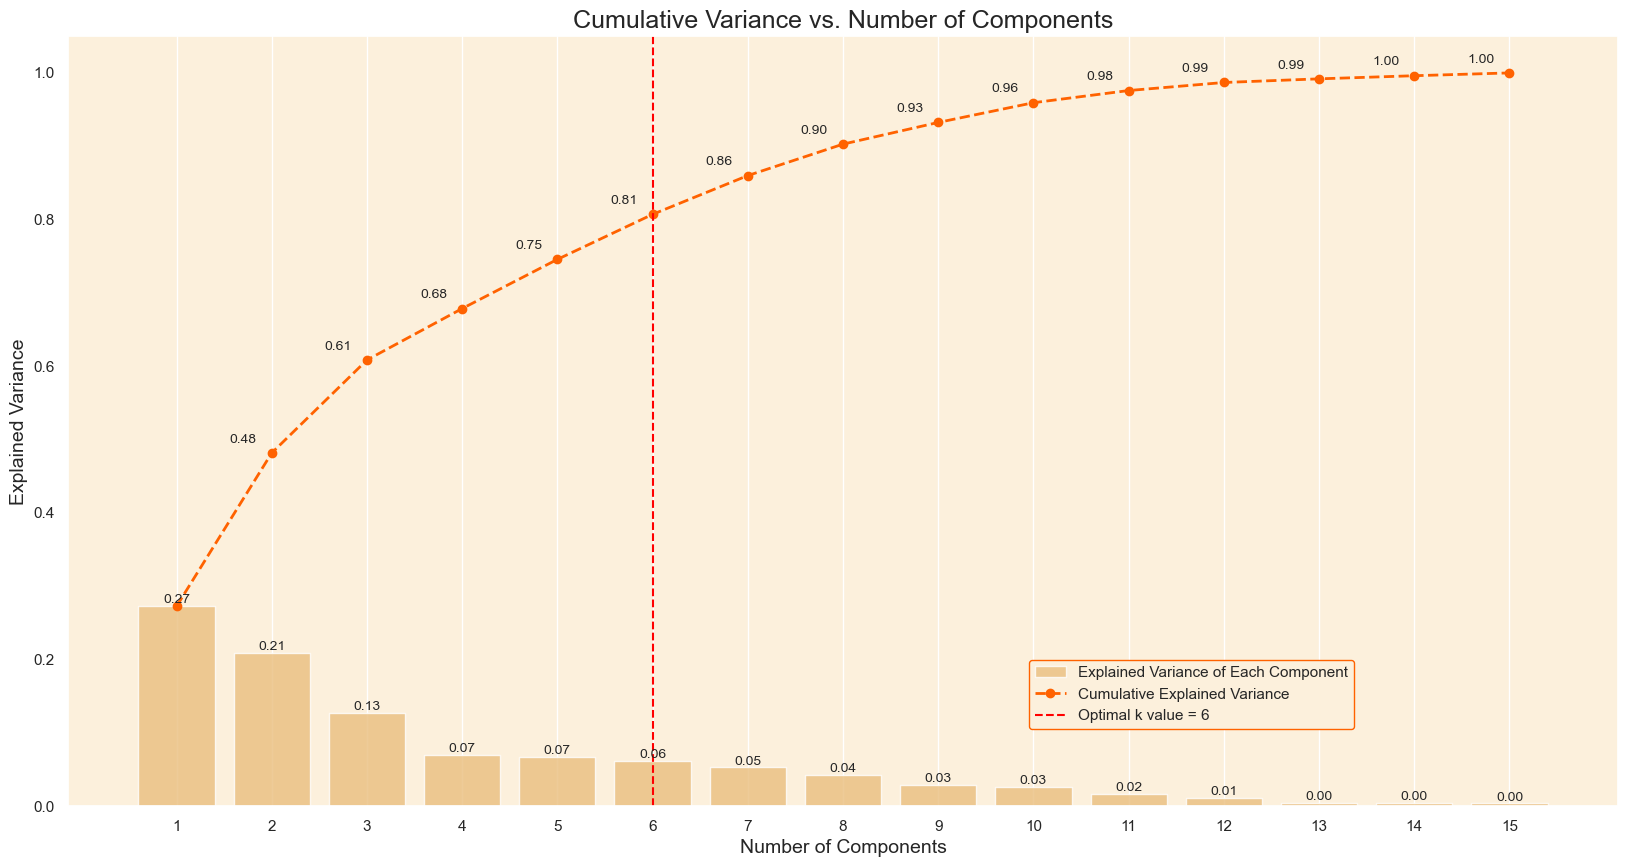

In [44]:
from sklearn.decomposition import PCA

# Setting CustomerID as the index column
customer_data_scaled.set_index('CustomerID', inplace=True)

# Apply PCA
pca = PCA().fit(customer_data_scaled)

# Calculate the Cumulative Sum of the Explained Variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Set the optimal k value (based on our analysis, we can choose 6)
optimal_k = 6

# Set seaborn plot style
sns.set(rc={'axes.facecolor': '#fcf0dc'}, style='darkgrid')

# Plot the cumulative explained variance against the number of components
plt.figure(figsize=(20, 10))

# Bar chart for the explained variance of each component
barplot = sns.barplot(x=list(range(1, len(cumulative_explained_variance) + 1)),
                      y=explained_variance_ratio,
                      color='#fcc36d',
                      alpha=0.8)

# Line plot for the cumulative explained variance
lineplot, = plt.plot(range(0, len(cumulative_explained_variance)), cumulative_explained_variance,
                     marker='o', linestyle='--', color='#ff6200', linewidth=2)

# Plot optimal k value line
optimal_k_line = plt.axvline(optimal_k - 1, color='red', linestyle='--', label=f'Optimal k value = {optimal_k}') 

# Set labels and title
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Cumulative Variance vs. Number of Components', fontsize=18)

# Customize ticks and legend
plt.xticks(range(0, len(cumulative_explained_variance)))
plt.legend(handles=[barplot.patches[0], lineplot, optimal_k_line],
           labels=['Explained Variance of Each Component', 'Cumulative Explained Variance', f'Optimal k value = {optimal_k}'],
           loc=(0.62, 0.1),
           frameon=True,
           framealpha=1.0,  
           edgecolor='#ff6200')  

# Display the variance values for both graphs on the plots
x_offset = -0.3
y_offset = 0.01
for i, (ev_ratio, cum_ev_ratio) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance)):
    plt.text(i, ev_ratio, f"{ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)
    if i > 0:
        plt.text(i + x_offset, cum_ev_ratio + y_offset, f"{cum_ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)

plt.grid(axis='both')   
plt.show()

<h5>To choose the optimal number of components, we generally look for a point where adding another component doesn't significantly increase the cumulative explained variance, often referred to as the "elbow point" in the curve.

From the plot, we can see that the increase in cumulative variance starts to slow down after the 6th component (which captures about 81% of the total variance).

Considering the context of customer segmentation, we want to retain a sufficient amount of information to identify distinct customer groups effectively. Therefore, retaining the first 6 components might be a balanced choice, as they together explain a substantial portion of the total variance while reducing the dimensionality of the dataset.</h5>

In [45]:
# Creating a PCA object with 6 components
pca = PCA(n_components=6)

# Fitting and transforming the original data to the new PCA dataframe
customer_data_pca = pca.fit_transform(customer_data_scaled)

# Creating a new dataframe from the PCA dataframe, with columns labeled PC1, PC2, etc.
customer_data_pca = pd.DataFrame(customer_data_pca, columns=['PC'+str(i+1) for i in range(pca.n_components_)])

# Adding the CustomerID index back to the new PCA dataframe
customer_data_pca.index = customer_data_scaled.index

In [46]:
customer_data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
CustomerID,,,,,,
12346.0,-2.129215,-1.835516,-1.759519,-1.321975,0.304378,-1.439156
12347.0,4.279587,-1.092484,2.221385,0.938842,-0.578170,0.776087
12350.0,-1.994417,-0.646337,0.718719,-1.117507,-1.098451,-0.137993
12352.0,0.843907,-1.420174,-0.805415,0.373908,-0.830148,0.382981
12353.0,-2.514115,0.365512,-0.435244,-0.537890,-1.548512,0.481737


<h1>Determining Optimal Number of Clusters</h1>

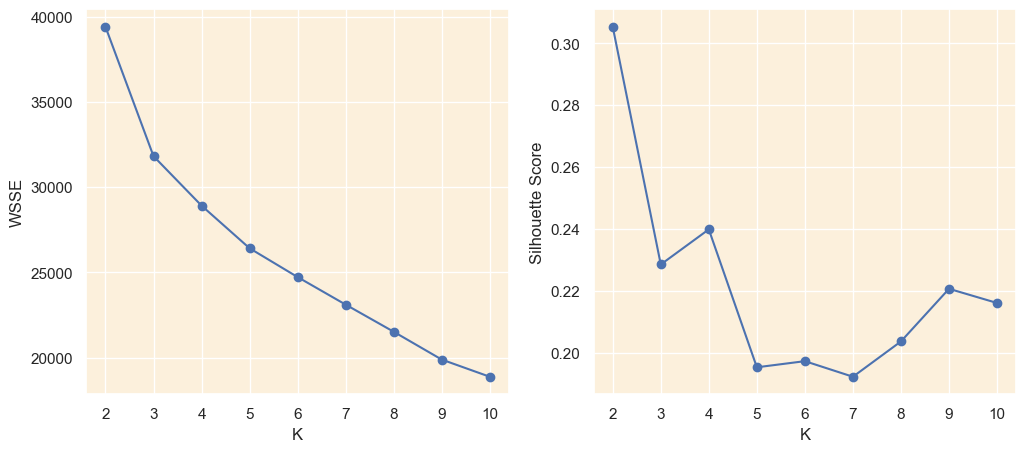

In [47]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k_range=range(2,11)
wsse=[]
SilhouetteScore = []

for k in k_range:
    Kmeans = KMeans(n_clusters=k)
    Kmeans.fit(customer_data_pca)
    wsse.append(Kmeans.inertia_)
 
    labels=Kmeans.labels_
    silhouette_avg=silhouette_score(customer_data_pca,labels,random_state=0)
    SilhouetteScore.append(silhouette_avg)

fig , (ax1,ax2) = plt.subplots(1,2,figsize=(12,5))

ax1.plot(k_range,wsse,marker="o")
ax1.set_xlabel("K")
ax1.set_ylabel("WSSE")

ax2.plot(k_range,SilhouetteScore,marker="o")
ax2.set_xlabel("K")
ax2.set_ylabel("Silhouette Score")

plt.show()

<h1>Considering k value 3 i.e. number of clusters to be 5</h1>

In [48]:
customer_data_pca_copy=customer_data_pca.copy()
customer_data_pca_copy

,PC1,PC2,PC3,PC4,PC5,PC6
CustomerID,,,,,,
12346.0,-2.129215,-1.835516,-1.759519,-1.321975,0.304378,-1.439156
12347.0,4.279587,-1.092484,2.221385,0.938842,-0.578170,0.776087
12350.0,-1.994417,-0.646337,0.718719,-1.117507,-1.098451,-0.137993
12352.0,0.843907,-1.420174,-0.805415,0.373908,-0.830148,0.382981
12353.0,-2.514115,0.365512,-0.435244,-0.537890,-1.548512,0.481737
...,...,...,...,...,...,...
18280.0,-2.058054,-2.802635,0.041773,-0.600030,0.573542,-1.082319
18281.0,-2.605397,3.189049,-0.609255,-0.148724,0.630572,-0.809705
18282.0,-1.398372,1.302314,-1.657246,0.813390,0.299679,0.422987


In [49]:
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=100, random_state=0)
y_pred = kmeans.fit_predict(customer_data_pca)

customer_data_pca_copy["Cluster"] = y_pred
customer_data_pca_copy

,PC1,PC2,PC3,PC4,PC5,PC6,Cluster
CustomerID,,,,,,,
12346.0,-2.129215,-1.835516,-1.759519,-1.321975,0.304378,-1.439156,1
12347.0,4.279587,-1.092484,2.221385,0.938842,-0.578170,0.776087,0
12350.0,-1.994417,-0.646337,0.718719,-1.117507,-1.098451,-0.137993,1
12352.0,0.843907,-1.420174,-0.805415,0.373908,-0.830148,0.382981,1
12353.0,-2.514115,0.365512,-0.435244,-0.537890,-1.548512,0.481737,2
...,...,...,...,...,...,...,...
18280.0,-2.058054,-2.802635,0.041773,-0.600030,0.573542,-1.082319,1
18281.0,-2.605397,3.189049,-0.609255,-0.148724,0.630572,-0.809705,2
18282.0,-1.398372,1.302314,-1.657246,0.813390,0.299679,0.422987,2


In [50]:
customer_data_pca_copy['Cluster'].value_counts(normalize=True) * 100

Cluster
2    40.306255
1    40.254347
0    19.439398
Name: proportion, dtype: float64

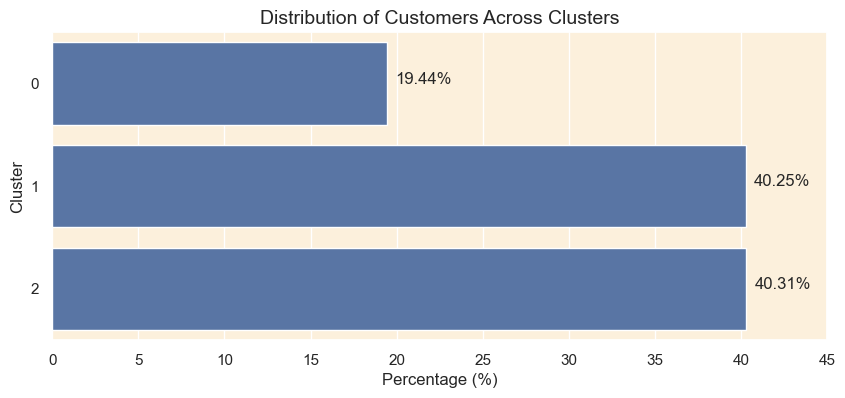

In [51]:
# Calculate the percentage of customers in each cluster
cluster_percentage = (customer_data_pca_copy['Cluster'].value_counts(normalize=True) * 100).reset_index()
cluster_percentage.columns = ['Cluster', 'Percentage']
cluster_percentage.sort_values(by='Cluster', inplace=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 4))
sns.barplot(x='Percentage', y='Cluster', data=cluster_percentage, orient='h')

# Adding percentages on the bars
for index, value in enumerate(cluster_percentage['Percentage']):
    plt.text(value+0.5, index, f'{value:.2f}%')

plt.title('Distribution of Customers Across Clusters', fontsize=14)
plt.xticks(ticks=np.arange(0, 50, 5))
plt.xlabel('Percentage (%)')

# Show the plot
plt.show()

In [52]:
# Separate the features and the cluster labels
X = customer_data_pca_copy.drop('Cluster', axis=1)
clusters = customer_data_pca_copy['Cluster']

# Compute the metrics
sil_score = silhouette_score(X, clusters)

sil_score

0.228490490980307

In [53]:
from collections import Counter
# Get the frequency of each cluster
cluster_frequencies = Counter(kmeans.labels_)

# Create a mapping from old labels to new labels based on frequency
label_mapping = {label: new_label for new_label, (label, _) in 
                 enumerate(cluster_frequencies.most_common())}

# Reverse the mapping to assign labels as per your criteria
label_mapping = {v: k for k, v in {2: 1, 1: 0, 0: 2}.items()}

# Apply the mapping to get the new labels
new_labels = np.array([label_mapping[label] for label in kmeans.labels_])

# Append the new cluster labels back to the original dataset
customer_data_cleaned['cluster'] = new_labels

# Append the new cluster labels to the PCA version of the dataset
customer_data_pca['cluster'] = new_labels

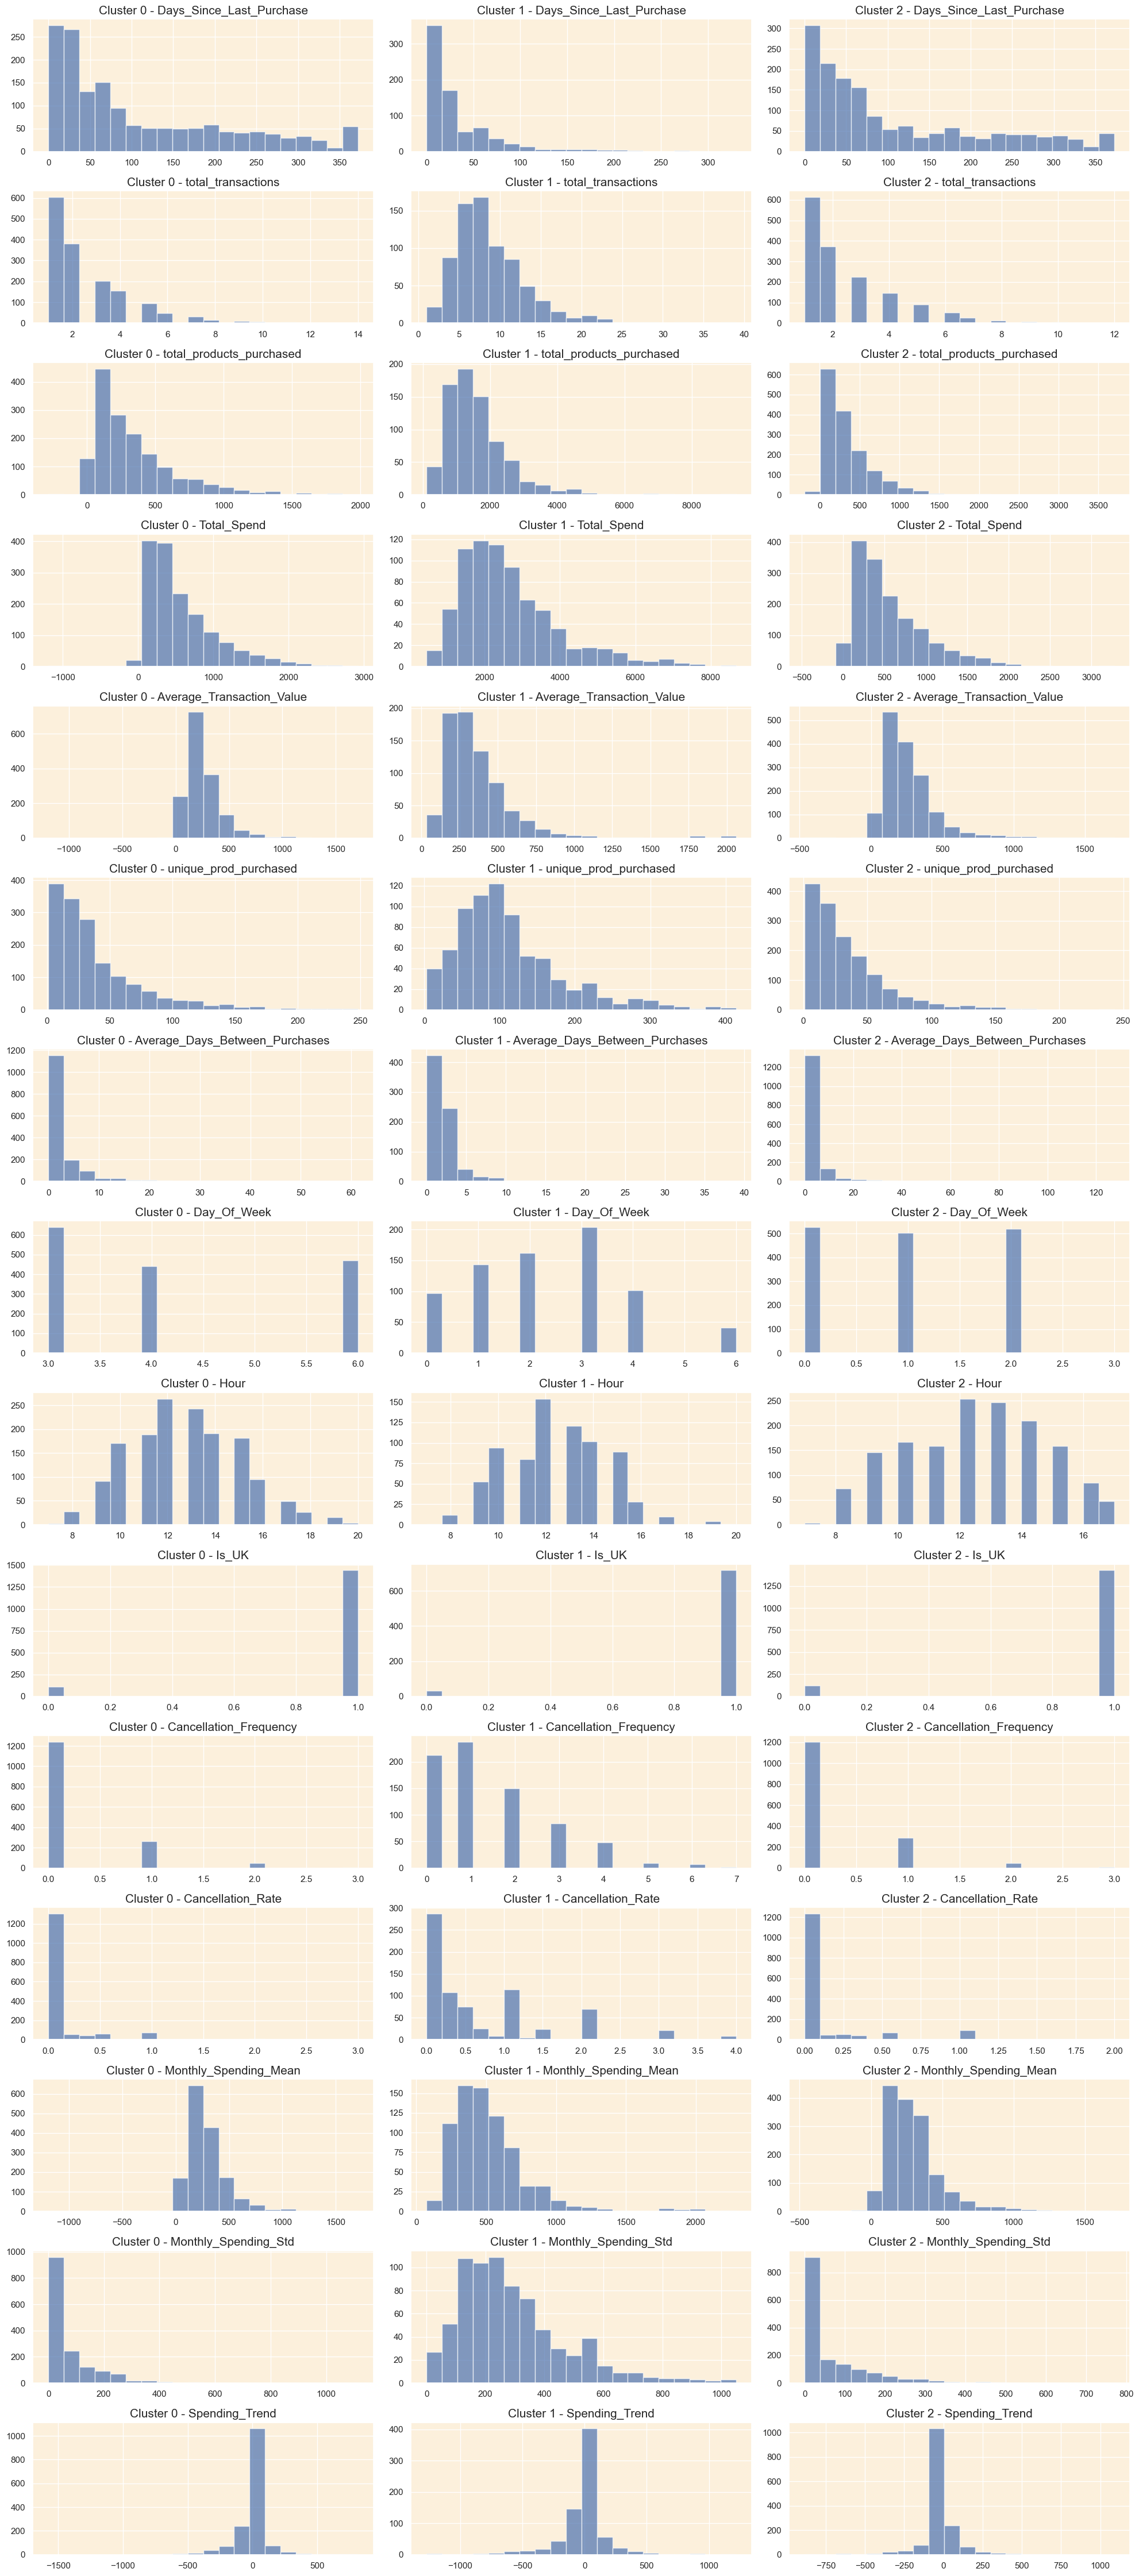

In [54]:
# Plot histograms for each feature segmented by the clusters
features = customer_data_cleaned.columns[1:-1]
clusters = customer_data_cleaned['cluster'].unique()
clusters.sort()

# Setting up the subplots
n_rows = len(features)
n_cols = len(clusters)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 3*n_rows))

# Plotting histograms
for i, feature in enumerate(features):
    for j, cluster in enumerate(clusters):
        data = customer_data_cleaned[customer_data_cleaned['cluster'] == cluster][feature]
        axes[i, j].hist(data, bins=20,edgecolor='w', alpha=0.7)
        axes[i, j].set_title(f'Cluster {cluster} - {feature}', fontsize=15)
        axes[i, j].set_xlabel('')
        axes[i, j].set_ylabel('')

# Adjusting layout to prevent overlapping
plt.tight_layout()
plt.show()

<h1>Recommendation System</h1>

In [55]:
# Extract the CustomerIDs of the outliers and remove their transactions from the main dataframe
outlier_customer_ids = outliers_data["CustomerID"].astype("float").unique()
df_filtered = df[~df["CustomerID"].isin(outlier_customer_ids)]

In [57]:
customer_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3853 entries, 0 to 3852
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CustomerID                      3853 non-null   object 
 1   Days_Since_Last_Purchase        3853 non-null   int64  
 2   total_transactions              3853 non-null   int64  
 3   total_products_purchased        3853 non-null   int64  
 4   Total_Spend                     3853 non-null   float64
 5   Average_Transaction_Value       3853 non-null   float64
 6   unique_prod_purchased           3853 non-null   int64  
 7   Average_Days_Between_Purchases  3853 non-null   float64
 8   Day_Of_Week                     3853 non-null   int32  
 9   Hour                            3853 non-null   int32  
 10  Is_UK                           3853 non-null   int64  
 11  Cancellation_Frequency          3853 non-null   float64
 12  Cancellation_Rate               38

In [58]:
customer_data_cleaned["CustomerID"] = customer_data_cleaned["CustomerID"].astype("float")

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399573 entries, 0 to 399572
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   InvoiceNo           399573 non-null  object        
 1   StockCode           399573 non-null  object        
 2   Description         399573 non-null  object        
 3   Quantity            399573 non-null  int64         
 4   InvoiceDate         399573 non-null  datetime64[ns]
 5   UnitPrice           399573 non-null  float64       
 6   CustomerID          399573 non-null  float64       
 7   Country             399573 non-null  object        
 8   transaction_status  399573 non-null  object        
 9   InvoiceDay          399573 non-null  object        
 10  Total_Spend         399573 non-null  float64       
 11  Day_Of_Week         399573 non-null  int32         
 12  Hour                399573 non-null  int32         
 13  Year                399573 no

In [60]:
# Merge the transaction data with the customer data to get the cluster information for each transaction
data_merged = df_filtered.merge(customer_data_cleaned[["CustomerID" , "cluster"]] ,on="CustomerID" , how = "inner")


In [61]:
data_merged

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,transaction_status,InvoiceDay,Total_Spend,Day_Of_Week,Hour,Year,Month,cluster
0,536371,22086,PAPER CHAIN KIT 50'S CHRISTMAS,80,2010-12-01 09:00:00,2.55,13748.0,United Kingdom,Completed,2010-12-01,204.00,2,9,2010,12,2
1,536374,21258,VICTORIAN SEWING BOX LARGE,32,2010-12-01 09:09:00,10.95,15100.0,United Kingdom,Completed,2010-12-01,350.40,2,9,2010,12,2
2,536380,22961,JAM MAKING SET PRINTED,24,2010-12-01 09:41:00,1.45,17809.0,United Kingdom,Completed,2010-12-01,34.80,2,9,2010,12,1
3,536382,10002,INFLATABLE POLITICAL GLOBE,12,2010-12-01 09:45:00,0.85,16098.0,United Kingdom,Completed,2010-12-01,10.20,2,9,2010,12,2
4,536382,21912,VINTAGE SNAKES & LADDERS,8,2010-12-01 09:45:00,3.75,16098.0,United Kingdom,Completed,2010-12-01,30.00,2,9,2010,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254282,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,Completed,2011-12-09,10.20,4,12,2011,12,0
254283,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,Completed,2011-12-09,12.60,4,12,2011,12,0
254284,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,Completed,2011-12-09,16.60,4,12,2011,12,0
254285,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,Completed,2011-12-09,16.60,4,12,2011,12,0


In [62]:
# Identify the top 10 best-selling products in each cluster based on the total quantity sold

best_selling_products = data_merged.groupby(["StockCode","Description","cluster"])["Quantity"].sum().reset_index()
best_selling_products = best_selling_products.sort_values(by=["cluster","Quantity"] , ascending = [True,False])

In [63]:
best_selling_products.head()

,StockCode,Description,cluster,Quantity
8306,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,0,4648
8936,84879,ASSORTED COLOUR BIRD ORNAMENT,0,4305
9432,85123A,WHITE HANGING HEART T-LIGHT HOLDER,0,3584
35,15036,ASSORTED COLOURS SILK FAN,0,3200
1365,21326,AGED GLASS SILVER T-LIGHT HOLDER,0,3005


In [64]:
# For each cluster, select the top 10 rows

top_products_per_cluster = best_selling_products.groupby(["cluster"]).head(10)


In [65]:
top_products_per_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 8306 to 3050
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   StockCode    30 non-null     object
 1   Description  30 non-null     object
 2   cluster      30 non-null     int32 
 3   Quantity     30 non-null     int64 
dtypes: int32(1), int64(1), object(2)
memory usage: 1.1+ KB


In [66]:
# Create a record of products purchased by each customer in each cluster
customer_purchase = data_merged.groupby(["CustomerID","StockCode","cluster"])["Quantity"].sum().reset_index()

In [70]:
# Generate recommendations for each customer in each cluster

recommendation = []

for cluster in top_products_per_cluster["cluster"].unique():
    top_products = top_products_per_cluster[top_products_per_cluster["cluster"] == cluster]
    customer_id_in_cluster = customer_data_cleaned[customer_data_cleaned["cluster"] == cluster]["CustomerID"]

    # Identify products already purchased by the customer
    for customer in customer_id_in_cluster:
        customer_purchased_product = customer_purchase[(customer_purchase["CustomerID"]==customer) & (customer_purchase["cluster"]==cluster)]["StockCode"].tolist()
        
        # getting top 3 products in the best-selling list that the customer hasn't purchased yet

        top_products_not_purchased = top_products[~top_products["StockCode"].isin(customer_purchased_product)]
        top_3_products_not_purchased = top_products_not_purchased.head(3)
        recommendation.append([customer, cluster] + top_3_products_not_purchased[['StockCode', 'Description']].values.flatten().tolist())

# Create a dataframe from the recommendations list and merge it with the original customer data
recommendations_df = pd.DataFrame(recommendation, columns=['CustomerID', 'cluster', 'Rec1_StockCode', 'Rec1_Description', 'Rec2_StockCode', 'Rec2_Description', 'Rec3_StockCode', 'Rec3_Description'])
customer_data_with_recommendations = customer_data_cleaned.merge(recommendations_df, on=['CustomerID', 'cluster'], how='right')

In [72]:
# Display 10 random rows from the customer_data_with_recommendations dataframe
customer_data_with_recommendations.set_index('CustomerID').iloc[:, -6:].sample(10, random_state=1)

,Rec1_StockCode,Rec1_Description,Rec2_StockCode,Rec2_Description,Rec3_StockCode,Rec3_Description
CustomerID,,,,,,
15350.0,84879,ASSORTED COLOUR BIRD ORNAMENT,85123A,WHITE HANGING HEART T-LIGHT HOLDER,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS
12434.0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,84879,ASSORTED COLOUR BIRD ORNAMENT,85123A,WHITE HANGING HEART T-LIGHT HOLDER
16959.0,84879,ASSORTED COLOUR BIRD ORNAMENT,85123A,WHITE HANGING HEART T-LIGHT HOLDER,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS
13948.0,84879,ASSORTED COLOUR BIRD ORNAMENT,85123A,WHITE HANGING HEART T-LIGHT HOLDER,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS
12386.0,84879,ASSORTED COLOUR BIRD ORNAMENT,85123A,WHITE HANGING HEART T-LIGHT HOLDER,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS
12414.0,84879,ASSORTED COLOUR BIRD ORNAMENT,85123A,WHITE HANGING HEART T-LIGHT HOLDER,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS
15942.0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,84879,ASSORTED COLOUR BIRD ORNAMENT,85123A,WHITE HANGING HEART T-LIGHT HOLDER
13615.0,84879,ASSORTED COLOUR BIRD ORNAMENT,85123A,WHITE HANGING HEART T-LIGHT HOLDER,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS
14834.0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,85099B,JUMBO BAG RED RETROSPOT,22616,PACK OF 12 LONDON TISSUES
